In [12]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-white')

In [3]:
# import data
team_season = pd.read_hdf('dataframes/team_season.h5', 'team_season')
team_season['Year'] = pd.DatetimeIndex(team_season['Time']).year
team_playoff = pd.read_hdf('dataframes/team_playoff.h5', 'team_playoff')
team_playoff['Year'] = pd.DatetimeIndex(team_playoff['Time']).year
Year = list(set(team_season['Year']))

In [4]:
team_compare = pd.DataFrame({
                    'Year': Year,
                    'season_3PA': team_season.groupby(team_season['Year']).mean()['3PA'],
                    'season_3PM': team_season.groupby(team_season['Year']).mean()['3PM'],
                    'playoff_3PA': team_playoff.groupby(team_playoff['Year']).mean()['3PA'],
                    'playoff_3PM': team_playoff.groupby(team_playoff['Year']).mean()['3PM']})
team_compare.head()

,Year,season_3PA,season_3PM,playoff_3PA,playoff_3PM
Year,,,,,
1985,1985,3.148499,0.890995,NaN,NaN
1986,1986,3.641236,1.058008,4.328125,1.421875
1987,1987,4.807595,1.461392,5.384000,1.648000
1988,1988,5.282339,1.685174,5.813333,1.846667
1989,1989,6.859777,2.214525,9.663793,3.068966


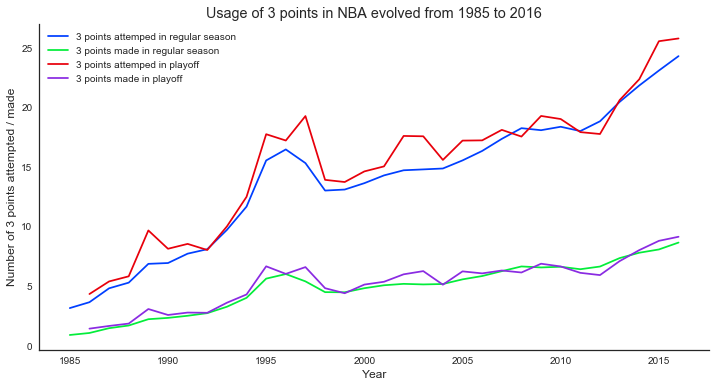

In [16]:
# plot the graph
ax = team_compare.plot(x= 'Year',y = ['season_3PA','season_3PM','playoff_3PA','playoff_3PM'],figsize=(12, 6))
ax.set_title("Usage of 3 points in NBA evolved from 1985 to 2016")
ax.set_ylabel("Number of 3 points attempted / made")
ax.legend(['3 points attemped in regular season',
          '3 points made in regular season',
          '3 points attemped in playoff',
          '3 points made in playoff'])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()